<a href="https://colab.research.google.com/github/ardra-aaah/IPLDataVisualisation/blob/main/Assignment_wk3_celebal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Dataset: IPL Match records data set (2008-2024) ---[Kaggle link](https://colab.research.google.com/drive/1Hs40bH-m2AaAG5TnolL-5q2ZbxZEaWJO#scrollTo=mr9T5AKAP0FE&line=1&uniqifier=1)

Visualisations done:
1. Top 10 teams with Most matches wins
2. Visualising the distribution of match wins: batted/fielded first.
3. Top 10 player who's won the most "Player of the match" awards.
4. Distribution of victory margin distribution: Runs v/s Wickets
5. Distribution matches where the teams that won the tose won the match too, along with toss choices.
6. Distribution showing if the teams with most wins, won most of the games where they chose to bat/field first.




In [36]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")# Load data

df = pd.read_csv("matches.csv")

# Preview data
df.head()



,id,season,city,date,match_type,player_of_match,venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,target_runs,target_overs,super_over,method,umpire1,umpire2
0,335982,2007/08,Bangalore,2008-04-18,League,BB McCullum,M Chinnaswamy Stadium,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,223.0,20.0,N,NaN,Asad Rauf,RE Koertzen
1,335983,2007/08,Chandigarh,2008-04-19,League,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33.0,241.0,20.0,N,NaN,MR Benson,SL Shastri
2,335984,2007/08,Delhi,2008-04-19,League,MF Maharoof,Feroz Shah Kotla,Delhi Daredevils,Rajasthan Royals,Rajasthan Royals,bat,Delhi Daredevils,wickets,9.0,130.0,20.0,N,NaN,Aleem Dar,GA Pratapkumar
3,335985,2007/08,Mumbai,2008-04-20,League,MV Boucher,Wankhede Stadium,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,Royal Challengers Bangalore,wickets,5.0,166.0,20.0,N,NaN,SJ Davis,DJ Harper
4,335986,2007/08,Kolkata,2008-04-20,League,DJ Hussey,Eden Gardens,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,bat,Kolkata Knight Riders,wickets,5.0,111.0,20.0,N,NaN,BF Bowden,K Hariharan


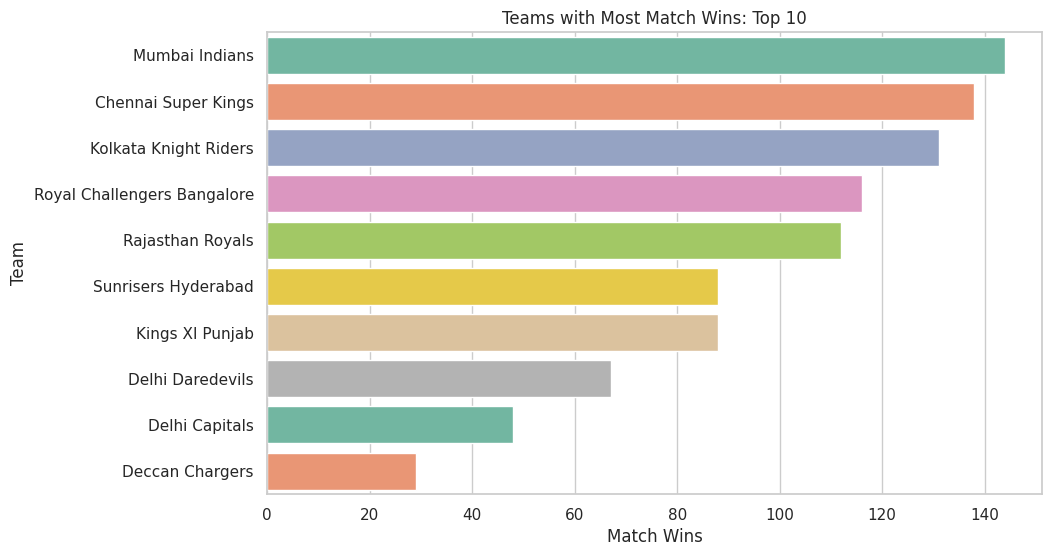

In [37]:
#Top 10 teams with Most matches wins
team_wins = df['winner'].value_counts().head(10).reset_index()
team_wins.columns = ['team', 'wins']

plt.figure(figsize=(10,6))
sns.barplot(data=team_wins, x='wins', y='team', hue='team', palette='Set2', dodge=False, legend=False)
plt.title("Teams with Most Match Wins: Top 10")
plt.xlabel("Match Wins")
plt.ylabel("Team")
plt.show()


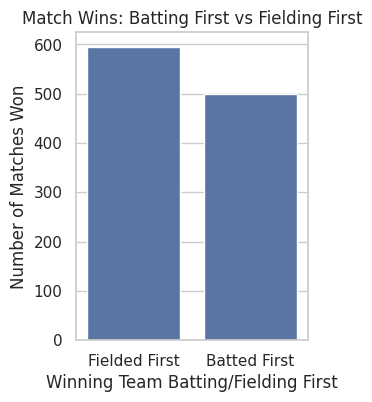

In [25]:
#Visualising the distribution of match wins: batted/fielded first.

#Creating a column indicating which team batted first
def get_batting_first_team(row):
    if row['toss_decision'] == 'bat':
        return row['toss_winner']
    else:
        # the other team is the one that didn't win toss
        return row['team1'] if row['toss_winner'] == row['team2'] else row['team2']

df['batting_first_team'] = df.apply(get_batting_first_team, axis=1)

#Marking if the winning team has batted/fielded first.
df['win_team_batted_first'] = df['winner'] == df['batting_first_team']

#Visualising counts of wins for teams batting first/fielding first overall
plt.figure(figsize=(3, 4))
sns.countplot(x='win_team_batted_first', data=df)
plt.xticks([0,1], ['Fielded First', 'Batted First'])
plt.title('Match Wins: Batting First vs Fielding First')
plt.xlabel('Winning Team Batting/Fielding First')
plt.ylabel('Number of Matches Won')
plt.show()



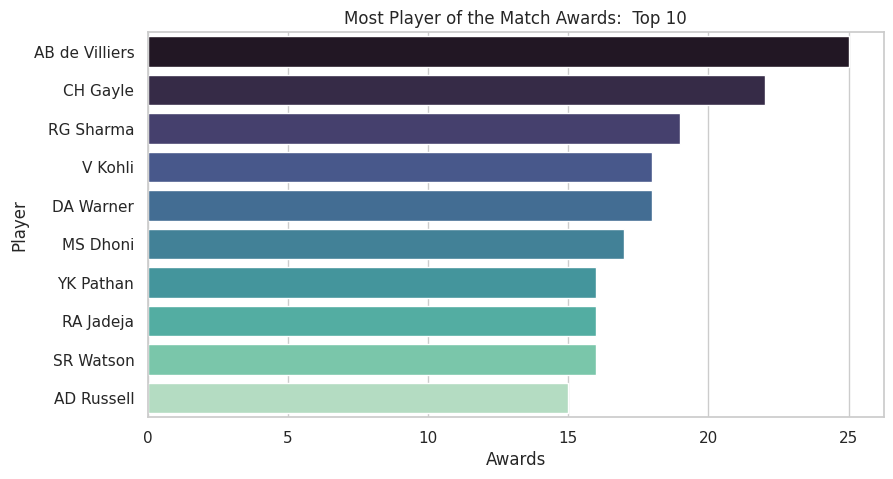

In [11]:
# Top 10 player who's won the most "Player of the match" awards.

top_pom = df['player_of_match'].value_counts().head(10).reset_index()
top_pom.columns = ['player', 'awards']

plt.figure(figsize=(9.5,5))
sns.barplot(data=top_pom, x='awards', y='player', hue='player', palette='mako', dodge=False, legend=False)
plt.title("Most Player of the Match Awards:  Top 10")
plt.xlabel("Awards")
plt.ylabel("Player")
plt.show()

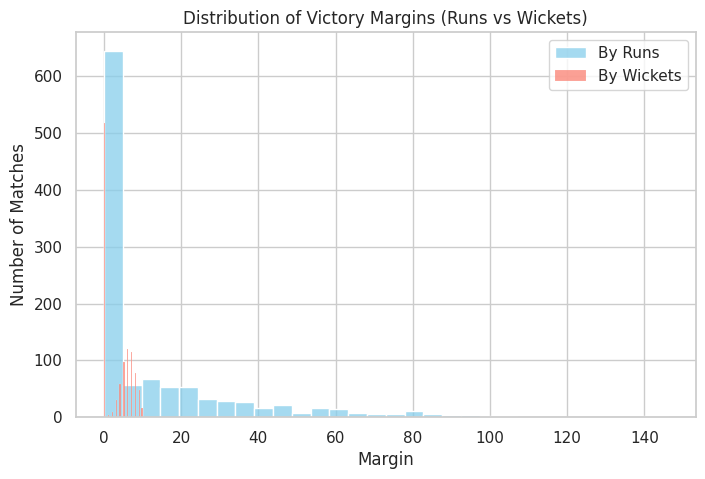

In [34]:
#Distribution of victory margin distribution: Runs v/s Wickets
df['win_by_runs'] = df.apply(lambda row: row['result_margin'] if row['result'] == 'runs' else 0, axis=1)
df['win_by_wickets'] = df.apply(lambda row: row['result_margin'] if row['result'] == 'wickets' else 0, axis=1)

plt.figure(figsize=(8,5))
sns.histplot(df['win_by_runs'], bins=30, color='skyblue', label='By Runs', kde=False)
sns.histplot(df['win_by_wickets'], bins=30, color='salmon', label='By Wickets', kde=False)
plt.legend()
plt.title("Distribution of Victory Margins (Runs vs Wickets)")
plt.xlabel("Margin")
plt.ylabel("Number of Matches")
plt.show()


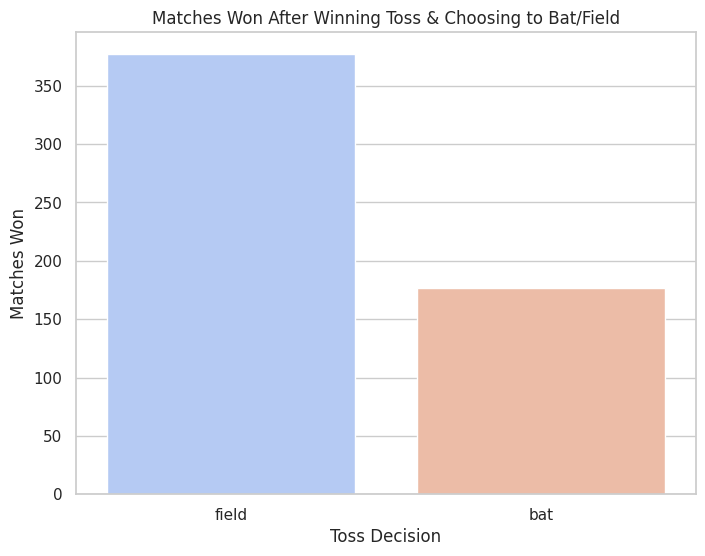

In [20]:
#Distribution matches where the teams that won the tose won the match too, along with toss choices.

# Filtering the rows where toss winner is same as match winner
won_aft_toss = df[df['toss_winner'] == df['winner']]

# Counting how many of those matches were won after choosing to 'bat' or 'field'
decision_wins = won_aft_toss['toss_decision'].value_counts().reset_index()
decision_wins.columns = ['toss_decision', 'wins']

# Plotting the findings
plt.figure(figsize=(8,6))
sns.barplot(data=decision_wins, x='toss_decision', y='wins', hue='toss_decision', palette='coolwarm', dodge=False, legend=False)
plt.title("Matches Won After Winning Toss & Choosing to Bat/Field")
plt.xlabel("Toss Decision")
plt.ylabel("Matches Won")
plt.show()



<ipython-input-43-b8be5591581a>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_teams_matches['win_team_first_action'] = top_teams_matches.apply(batting_fielding_first, axis=1)


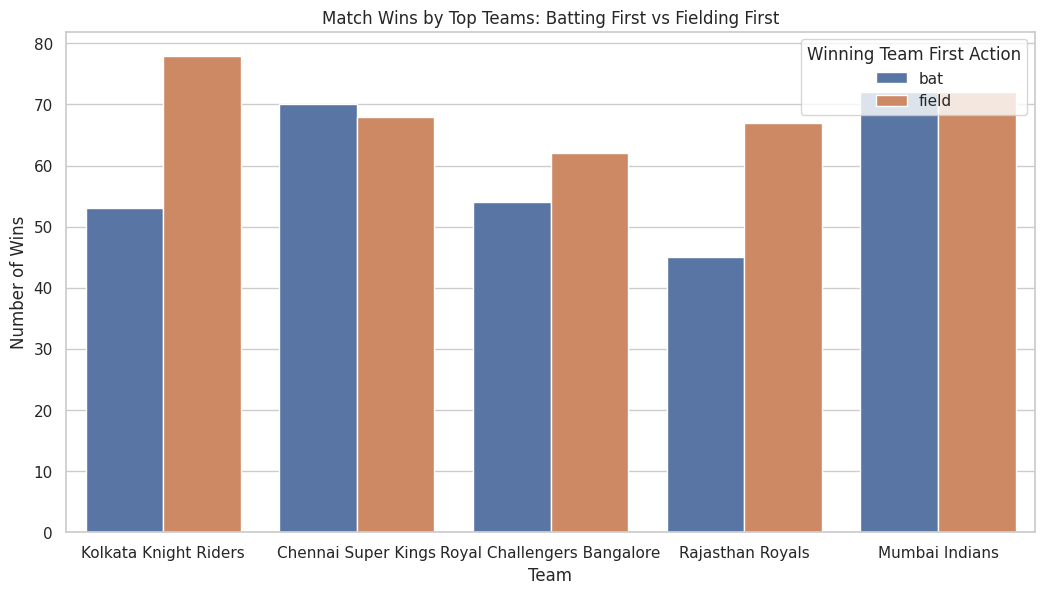

In [43]:
#Distribution showing if the teams with most wins, won most of the games where they chose to bat/field first.
win_counts = df['winner'].value_counts()
top_teams = win_counts.head(5).index.tolist()  # top 5 teams with most wins
top_teams_matches = df[df['winner'].isin(top_teams)] #Matches played by the top teams
#Checking if the wininng team chose to bat/field
def batting_fielding_first(row):
    if row['winner'] == row['toss_winner']:
        return 'bat' if row['toss_decision'] == 'bat' else 'field'
    else:
        # toss winner decided to bat, so winner (not toss winner) fields first
        return 'field' if row['toss_decision'] == 'bat' else 'bat'

top_teams_matches['win_team_first_action'] = top_teams_matches.apply(batting_fielding_first, axis=1)

#Bar plot of wins by batting/fielding first for each of the teams
plt.figure(figsize=(12.5, 6.5))
sns.countplot(data=top_teams_matches, x='winner', hue='win_team_first_action')
plt.title('Match Wins by Top Teams: Batting First vs Fielding First')
plt.xlabel('Team')
plt.ylabel('Number of Wins')
plt.legend(title='Winning Team First Action', loc='upper right')
plt.show()


